In [1]:
from PositionManager import PositionManager
from Structure import Structure
import pandas as pd
import cProfile
pm = PositionManager(True)

In [2]:
csv_file_path = 'historical_data.csv'  # 替换为你的CSV文件路径
# csv_file_path = 'bili_0131.csv'  # 替换为你的CSV文件路径

from fake_data import *
csv_data = load_csv_data(csv_file_path)

In [3]:
current_index = 0
contract = 'TSLA'
while True:
    bars, current_index = fake_fetch_minute_data(contract, csv_data, current_index)
    if bars is None: break
    bars = pd.DataFrame(bars)
    structure = Structure()
    # structure.cal(bars)
    current_time = bars.iloc[-1]["date"]
    pm.update(structure, bars, current_time)

2025-01-30 13:01:00-05:00 2025-01-30 13:40:00-05:00 True
2025-01-30 13:01:00-05:00 2025-01-30 13:42:00-05:00 True
2025-01-30 13:01:00-05:00 2025-01-30 13:43:00-05:00 True
2025-01-30 13:34:00-05:00 2025-01-30 13:53:00-05:00 True
2025-01-30 13:34:00-05:00 2025-01-30 13:55:00-05:00 True
2025-01-30 13:34:00-05:00 2025-01-30 14:09:00-05:00 True


In [4]:
pd.DataFrame(pm.trade_log)

""


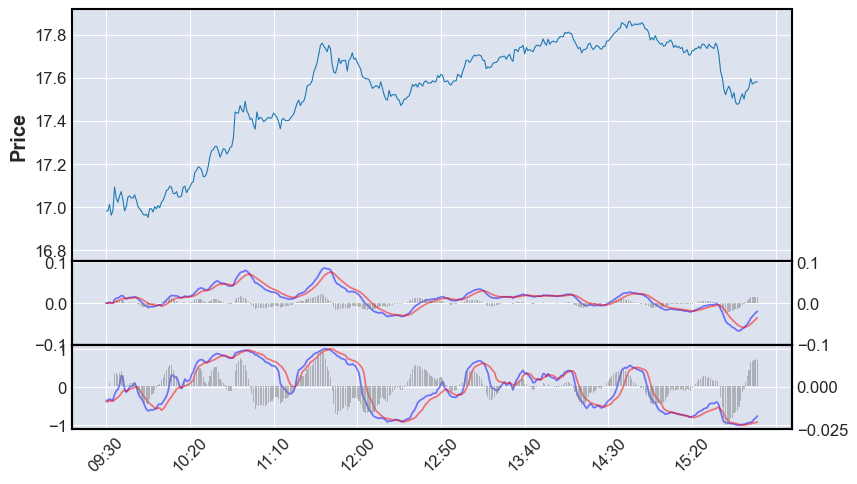

In [5]:
from plot import plot_debug_structure
df = structure.data.set_index('date', inplace=True, drop=False)
plot_debug_structure(structure.data, pm.trade_log)
